In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
folder_path = r"C:\Users\diyas\Desktop\Portfolio1\Cyclistic-bike-share\all_excel_files"
sheet_names = ['202401-divvy-tripdata', '202402-divvy-tripdata', '202403-divvy-tripdata', 
               '202404-divvy-tripdata', '202405-divvy-tripdata', '202406-divvy-tripdata', 
               '202407-divvy-tripdata', '202408-divvy-tripdata', '202409-divvy-tripdata', 
               '202410-divvy-tripdata', '202411-divvy-tripdata']


excel_files = glob.glob(f"{folder_path}/*.xlsx")

# Define the columns to keep
required_columns = ['ride_id', 'rideable_type', 'started_time', 'ended_time', 'member_casual', 'ride_length']

# Initialize an empty list to store DataFrames
dataframes = []

for file, sheet in zip(excel_files, sheet_names):
    # Read the Excel file with the specified sheet name
    df = pd.read_excel(file, sheet_name=sheet)
    
    # Select only the required columns
    df = df[required_columns]
    
    # Append the DataFrame to the list
    dataframes.append(df)

In [3]:
dataframes[0].isnull().sum()

ride_id          0
rideable_type    0
started_time     0
ended_time       0
member_casual    0
ride_length      0
dtype: int64

In [4]:
dataframes[1].isnull().sum()

ride_id          0
rideable_type    0
started_time     0
ended_time       0
member_casual    0
ride_length      0
dtype: int64

In [5]:
dataframes[6].dropna(inplace=True)


In [6]:
dataframes[6].isnull().sum()

ride_id          0
rideable_type    0
started_time     0
ended_time       0
member_casual    0
ride_length      0
dtype: int64

In [7]:
dataframes[7].isnull().sum()

ride_id          0
rideable_type    0
started_time     0
ended_time       0
member_casual    0
ride_length      0
dtype: int64

In [8]:
dataframes[8].isnull().sum()

ride_id          0
rideable_type    0
started_time     0
ended_time       0
member_casual    0
ride_length      0
dtype: int64

In [9]:
dataframes[9].isnull().sum()

ride_id          0
rideable_type    0
started_time     0
ended_time       0
member_casual    0
ride_length      0
dtype: int64

In [10]:
dataframes[10].isnull().sum()

ride_id          0
rideable_type    0
started_time     0
ended_time       0
member_casual    0
ride_length      0
dtype: int64

In [11]:
for i in dataframes:
    print(i.describe())


                 ride_id rideable_type started_time ended_time member_casual  \
count             144873        144873       144873     144873        144873   
unique            144871             2         1440       1440             2   
top     5840000000000000  classic_bike     17:18:00   17:25:00        member   
freq                   2         76525          322        311        120413   

       ride_length  
count       144873  
unique         501  
top       00:05:00  
freq         13850  
                 ride_id rideable_type started_time ended_time member_casual  \
count             223164        223164       223164     223164        223164   
unique            223164             2         1440       1439             2   
top     93EA6DD6E63829ED  classic_bike     17:05:00   17:28:00        member   
freq                   1        140314          511        499        176001   

       ride_length  
count       223164  
unique         549  
top       00:05:00  
freq     

In [12]:
jan_df = dataframes[0]
feb_df = dataframes[1]
mar_df = dataframes[2]
apr_df = dataframes[3]
may_df = dataframes[4]
jun_df = dataframes[5]
jul_df = dataframes[6]
aug_df = dataframes[7]
sept_df = dataframes[8]
oct_df = dataframes[9]
nov_df = dataframes[10]

January Summary


In [13]:
jan_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          144871
rideable_type         2
member_casual         2
dtype: int64

In [14]:
members_count_jan = len(jan_df[jan_df['member_casual']=='member'])
casual_count_jan = jan_df[jan_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_jan}")
print(f"Number of casual riders: {casual_count_jan}")


Number of members: 120413
Number of casual riders: 24460


In [15]:
# Convert 'ride_length' from datetime.time to total duration in seconds
jan_df['ride_length_seconds'] = jan_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = jan_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_jan = mean_ride_length_seconds_overall / 60

members_df = jan_df[jan_df['member_casual']=='member']
casual_df = jan_df[jan_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_jan = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_jan = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Jan: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_jan:.3f} minutes)")
print(f"Mean ride length for casual users in Jan: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_jan:.3f} minutes)")
print(f"Overall mean ride length in Jan: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_jan:.3f} minutes)")


Mean ride length for members in Jan: 777.738 seconds (12.962 minutes)
Mean ride length for casual users in Jan: 1041.802 seconds (17.363 minutes)
Overall mean ride length in Jan: 822.322 seconds (13.705 minutes)


In [16]:
jan_df['ride_length_seconds'].describe()

count    144873.000000
mean        822.321758
std        3889.183846
min           0.000000
25%         240.000000
50%         420.000000
75%         720.000000
max       86340.000000
Name: ride_length_seconds, dtype: float64

In [17]:
maximum = jan_df['ride_length_seconds'].max()
maximum_ride_minutes_jan = maximum/60
print(f"Maximum ride length in Jan: {maximum} seconds ({maximum_ride_minutes_jan} minutes)")

Maximum ride length in Jan: 86340 seconds (1439.0 minutes)


In [18]:
minimum = jan_df['ride_length_seconds'].min()
minimum_ride_minutes_jan = minimum/60
print(f"Minimum ride length in Jan: {minimum} seconds ({minimum_ride_minutes_jan} minutes)")

Minimum ride length in Jan: 0 seconds (0.0 minutes)


In [19]:
jan_df.head(5)

,ride_id,rideable_type,started_time,ended_time,member_casual,ride_length,ride_length_seconds
0,C1D650626C8C899A,electric_bike,15:30:00,15:37:00,member,00:07:00,420
1,EECD38BDB25BFCB0,electric_bike,15:45:00,15:52:00,member,00:07:00,420
2,F4A9CE78061F17F7,electric_bike,12:27:00,12:35:00,member,00:08:00,480
3,0A0D9E15EE50B171,classic_bike,16:26:00,16:56:00,member,00:30:00,1800
4,33FFC9805E3EFF9A,classic_bike,05:43:00,06:09:00,member,00:26:00,1560


February Summary

In [20]:
feb_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          223164
rideable_type         2
member_casual         2
dtype: int64

In [21]:
feb_df.describe()

,ride_id,rideable_type,started_time,ended_time,member_casual,ride_length
count,223164,223164,223164,223164,223164,223164
unique,223164,2,1440,1439,2,549
top,93EA6DD6E63829ED,classic_bike,17:05:00,17:28:00,member,00:05:00
freq,1,140314,511,499,176001,18789


In [22]:
members_count_feb = len(feb_df[feb_df['member_casual']=='member'])
casual_count_feb = feb_df[feb_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_feb}")
print(f"Number of casual riders: {casual_count_feb}")


Number of members: 176001
Number of casual riders: 47163


In [23]:
# Convert 'ride_length' from datetime.time to total duration in seconds
feb_df['ride_length_seconds'] = feb_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = feb_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_feb = mean_ride_length_seconds_overall / 60

members_df = feb_df[feb_df['member_casual']=='member']
casual_df = feb_df[feb_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_feb = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_feb = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Feb: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_feb:.3f} minutes)")
print(f"Mean ride length for casual users in Feb: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_feb:.3f} minutes)")
print(f"Overall mean ride length in Feb: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_feb:.3f} minutes)")


Mean ride length for members in Feb: 792.401 seconds (13.207 minutes)
Mean ride length for casual users in Feb: 1305.917 seconds (21.765 minutes)
Overall mean ride length in Feb: 900.926 seconds (15.015 minutes)


In [24]:
feb_df['ride_length_seconds'].describe()

count    223164.000000
mean        900.926225
std        3676.547132
min           0.000000
25%         300.000000
50%         480.000000
75%         840.000000
max       86340.000000
Name: ride_length_seconds, dtype: float64

In [25]:
maximum = feb_df['ride_length_seconds'].max()
maximum_ride_minutes_feb = maximum/60
print(f"Maximum ride length in Feb:{maximum} seconds ({maximum_ride_minutes_feb} minutes)")

Maximum ride length in Feb:86340 seconds (1439.0 minutes)


In [26]:
minimum = feb_df['ride_length_seconds'].min()
minimum_ride_minutes_feb = minimum/60
print(f"Minimum ride length in Feb: {minimum} seconds ({minimum_ride_minutes_feb} minutes)")

Minimum ride length in Feb: 0 seconds (0.0 minutes)


March Summary


In [27]:
mar_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          301687
rideable_type         2
member_casual         2
dtype: int64

In [28]:
members_count_mar = len(mar_df[mar_df['member_casual']=='member'])
casual_count_mar = mar_df[mar_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_mar}")
print(f"Number of casual riders: {casual_count_mar}")

Number of members: 219137
Number of casual riders: 82550


In [29]:
# Convert 'ride_length' from datetime.time to total duration in seconds
mar_df['ride_length_seconds'] = mar_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = mar_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_mar = mean_ride_length_seconds_overall / 60

members_df = mar_df[mar_df['member_casual']=='member']
casual_df = mar_df[mar_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_mar = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_mar = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Mar: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_mar:.3f} minutes)")
print(f"Mean ride length for casual users in Mar: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_mar:.3f} minutes)")
print(f"Overall mean ride length in Mar: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_mar:.3f} minutes)")


Mean ride length for members in Mar: 822.833 seconds (13.714 minutes)
Mean ride length for casual users in Mar: 1509.954 seconds (25.166 minutes)
Overall mean ride length in Mar: 1010.848 seconds (16.847 minutes)


In [30]:
mar_df['ride_length_seconds'].describe()

count    301687.000000
mean       1010.848263
std        4443.046027
min           0.000000
25%         300.000000
50%         540.000000
75%         900.000000
max       86340.000000
Name: ride_length_seconds, dtype: float64

In [31]:
maximum = mar_df['ride_length_seconds'].max()
maximum_ride_minutes_mar = maximum/60
print(f"Maximum ride length in Mar:{maximum} seconds ({maximum_ride_minutes_mar} minutes)")

Maximum ride length in Mar:86340 seconds (1439.0 minutes)


In [32]:
minimum = mar_df['ride_length_seconds'].min()
minimum_ride_minutes_mar = minimum/60
print(f"Minimum ride length in Mar: {minimum} seconds ({minimum_ride_minutes_mar} minutes)")

Minimum ride length in Mar: 0 seconds (0.0 minutes)


April Summary


In [33]:
apr_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          415025
rideable_type         2
member_casual         2
dtype: int64

In [34]:
members_count_apr = len(apr_df[apr_df['member_casual']=='member'])
casual_count_apr = apr_df[apr_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_apr}")
print(f"Number of casual riders: {casual_count_apr}")

Number of members: 283215
Number of casual riders: 131810


In [35]:
# Convert 'ride_length' from datetime.time to total duration in seconds
apr_df['ride_length_seconds'] = apr_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = apr_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_apr = mean_ride_length_seconds_overall / 60

members_df = apr_df[apr_df['member_casual']=='member']
casual_df = apr_df[apr_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_apr = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_apr = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Apr: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_apr:.3f} minutes)")
print(f"Mean ride length for casual users in Apr: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_apr:.3f} minutes)")
print(f"Overall mean ride length in Apr: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_apr:.3f} minutes)")


Mean ride length for members in Apr: 855.770 seconds (14.263 minutes)
Mean ride length for casual users in Apr: 1601.032 seconds (26.684 minutes)
Overall mean ride length in Apr: 1092.461 seconds (18.208 minutes)


In [36]:
apr_df['ride_length_seconds'].describe()

count    415025.000000
mean       1092.461466
std        4465.926088
min           0.000000
25%         300.000000
50%         540.000000
75%        1020.000000
max       86340.000000
Name: ride_length_seconds, dtype: float64

In [37]:
maximum = apr_df['ride_length_seconds'].max()
maximum_ride_minutes_apr = maximum/60
print(f"Maximum ride length in Apr:{maximum} seconds ({maximum_ride_minutes_apr} minutes)")

Maximum ride length in Apr:86340 seconds (1439.0 minutes)


In [38]:
minimum = apr_df['ride_length_seconds'].min()
minimum_ride_minutes_apr = minimum/60
print(f"Minimum ride length in Apr: {minimum} seconds ({minimum_ride_minutes_apr} minutes)")

Minimum ride length in Apr: 0 seconds (0.0 minutes)


May Summary

In [39]:
may_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          609492
rideable_type         2
member_casual         2
dtype: int64

In [40]:
members_count_may = len(may_df[may_df['member_casual']=='member'])
casual_count_may = may_df[may_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_may}")
print(f"Number of casual riders: {casual_count_may}")

Number of members: 378475
Number of casual riders: 231018


In [41]:
# Convert 'ride_length' from datetime.time to total duration in seconds
may_df['ride_length_seconds'] = may_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = may_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_may = mean_ride_length_seconds_overall / 60

members_df = may_df[may_df['member_casual']=='member']
casual_df = may_df[may_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_may = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_may = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in May: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_may:.3f} minutes)")
print(f"Mean ride length for casual users in May: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_may:.3f} minutes)")
print(f"Overall mean ride length in May: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_may:.3f} minutes)")


Mean ride length for members in May: 967.931 seconds (16.132 minutes)
Mean ride length for casual users in May: 1805.293 seconds (30.088 minutes)
Overall mean ride length in May: 1285.319 seconds (21.422 minutes)


In [42]:
may_df['ride_length_seconds'].describe()

count    609493.000000
mean       1285.318814
std        5135.927433
min           0.000000
25%         360.000000
50%         660.000000
75%        1140.000000
max       86340.000000
Name: ride_length_seconds, dtype: float64

In [43]:
maximum = may_df['ride_length_seconds'].max()
maximum_ride_minutes_may = maximum/60
print(f"Maximum ride length in May:{maximum} seconds ({maximum_ride_minutes_may} minutes)")

Maximum ride length in May:86340 seconds (1439.0 minutes)


In [44]:
minimum = may_df['ride_length_seconds'].min()
minimum_ride_minutes_may = minimum/60
print(f"Minimum ride length in May: {minimum} seconds ({minimum_ride_minutes_may} minutes)")

Minimum ride length in May: 0 seconds (0.0 minutes)


June Summary

In [45]:
jun_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          710721
rideable_type         2
member_casual         2
dtype: int64

In [46]:
members_count_jun = len(jun_df[jun_df['member_casual']=='member'])
casual_count_jun = jun_df[jun_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_jun}")
print(f"Number of casual riders: {casual_count_jun}")

Number of members: 409594
Number of casual riders: 301127


In [47]:
# Convert 'ride_length' from datetime.time to total duration in seconds
jun_df['ride_length_seconds'] = jun_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = may_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_jun = mean_ride_length_seconds_overall / 60

members_df = jun_df[jun_df['member_casual']=='member']
casual_df = jun_df[jun_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_jun = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_jun = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in June: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_jun:.3f} minutes)")
print(f"Mean ride length for casual users in June: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_jun:.3f} minutes)")
print(f"Overall mean ride length in June: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_jun:.3f} minutes)")


Mean ride length for members in June: 990.140 seconds (16.502 minutes)
Mean ride length for casual users in June: 1100.908 seconds (18.348 minutes)
Overall mean ride length in June: 1285.319 seconds (21.422 minutes)


In [48]:
jun_df['ride_length_seconds'].describe()

count    710721.000000
mean       1037.071415
std         887.684694
min           0.000000
25%         377.000000
50%         704.000000
75%        1452.000000
max        3597.000000
Name: ride_length_seconds, dtype: float64

In [49]:
maximum = jun_df['ride_length_seconds'].max()
maximum_ride_minutes_jun = maximum/60
print(f"Maximum ride length in Jun:{maximum} seconds ({maximum_ride_minutes_jun} minutes)")

Maximum ride length in Jun:3597 seconds (59.95 minutes)


In [50]:
minimum = jun_df['ride_length_seconds'].min()
minimum_ride_minutes_jun = minimum/60
print(f"Minimum ride length in Jun: {minimum} seconds ({minimum_ride_minutes_jun} minutes)")

Minimum ride length in Jun: 0 seconds (0.0 minutes)


July Summary

In [51]:
jul_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          748962
rideable_type         2
member_casual         2
dtype: int64

In [52]:
members_count_jul = len(jul_df[jul_df['member_casual']=='member'])
casual_count_jul = jul_df[jul_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_jul}")
print(f"Number of casual riders: {casual_count_jul}")

Number of members: 428416
Number of casual riders: 320546


In [53]:
# Convert 'ride_length' from datetime.time to total duration in seconds
jul_df['ride_length_seconds'] = jul_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = jul_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_jul = mean_ride_length_seconds_overall / 60

members_df = jul_df[jul_df['member_casual']=='member']
casual_df = jul_df[jul_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_jul = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_jul = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Jul: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_jul:.3f} minutes)")
print(f"Mean ride length for casual users in Jul: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_jul:.3f} minutes)")
print(f"Overall mean ride length in Jul: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_jul:.3f} minutes)")


Mean ride length for members in Jul: 984.680 seconds (16.411 minutes)
Mean ride length for casual users in Jul: 1099.128 seconds (18.319 minutes)
Overall mean ride length in Jul: 1033.662 seconds (17.228 minutes)


In [54]:
jul_df['ride_length_seconds'].describe()

count    748962.000000
mean       1033.662084
std         885.648820
min           0.000000
25%         375.000000
50%         699.000000
75%        1450.000000
max        3594.000000
Name: ride_length_seconds, dtype: float64

In [55]:
maximum = jul_df['ride_length_seconds'].max()
maximum_ride_minutes_jul = maximum/60
print(f"Maximum ride length in Jul:{maximum} seconds ({maximum_ride_minutes_jul} minutes)")

Maximum ride length in Jul:3594 seconds (59.9 minutes)


In [56]:
minimum = jul_df['ride_length_seconds'].min()
minimum_ride_minutes_jul = minimum/60
print(f"Minimum ride length in Jul: {minimum} seconds ({minimum_ride_minutes_jul} minutes)")

Minimum ride length in Jul: 0 seconds (0.0 minutes)


August Summary

In [57]:
aug_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          755639
rideable_type         2
member_casual         2
dtype: int64

In [58]:
members_count_aug = len(aug_df[aug_df['member_casual']=='member'])
casual_count_aug = aug_df[aug_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_aug}")
print(f"Number of casual riders: {casual_count_aug}")

Number of members: 437359
Number of casual riders: 318280


In [59]:
# Convert 'ride_length' from datetime.time to total duration in seconds
aug_df['ride_length_seconds'] = aug_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = aug_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_aug = mean_ride_length_seconds_overall / 60

members_df = aug_df[aug_df['member_casual']=='member']
casual_df = aug_df[aug_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_aug = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_aug = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Aug: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_aug:.3f} minutes)")
print(f"Mean ride length for casual users in Aug: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_aug:.3f} minutes)")
print(f"Overall mean ride length in Aug: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_aug:.3f} minutes)")


Mean ride length for members in Aug: 970.574 seconds (16.176 minutes)
Mean ride length for casual users in Aug: 1085.000 seconds (18.083 minutes)
Overall mean ride length in Aug: 1018.771 seconds (16.980 minutes)


In [60]:
aug_df['ride_length_seconds'].describe()

count    755639.000000
mean       1018.771176
std         886.486749
min           0.000000
25%         366.000000
50%         679.000000
75%        1410.000000
max        3597.000000
Name: ride_length_seconds, dtype: float64

In [61]:
maximum = aug_df['ride_length_seconds'].max()
maximum_ride_minutes_aug = maximum/60
print(f"Maximum ride length in Aug:{maximum} seconds ({maximum_ride_minutes_aug} minutes)")

Maximum ride length in Aug:3597 seconds (59.95 minutes)


In [62]:
minimum = aug_df['ride_length_seconds'].min()
minimum_ride_minutes_aug = minimum/60
print(f"Minimum ride length in Aug: {minimum} seconds ({minimum_ride_minutes_aug} minutes)")

Minimum ride length in Aug: 0 seconds (0.0 minutes)


September Summary

In [63]:
sept_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          821275
rideable_type         3
member_casual         2
dtype: int64

In [64]:
members_count_sept = len(sept_df[sept_df['member_casual']=='member'])
casual_count_sept = sept_df[sept_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_sept}")
print(f"Number of casual riders: {casual_count_sept}")

Number of members: 474472
Number of casual riders: 346804


In [65]:
# Convert 'ride_length' from datetime.time to total duration in seconds
sept_df['ride_length_seconds'] = sept_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = sept_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_sept = mean_ride_length_seconds_overall / 60

members_df = sept_df[sept_df['member_casual']=='member']
casual_df = sept_df[sept_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_sept = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_sept = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Sept: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_sept:.3f} minutes)")
print(f"Mean ride length for casual users in Sept: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_sept:.3f} minutes)")
print(f"Overall mean ride length in Sept: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_sept:.3f} minutes)")


Mean ride length for members in Sept: 934.311 seconds (15.572 minutes)
Mean ride length for casual users in Sept: 1027.981 seconds (17.133 minutes)
Overall mean ride length in Sept: 973.866 seconds (16.231 minutes)


In [66]:
sept_df['ride_length_seconds'].describe()

count    821276.000000
mean        973.865797
std         897.056850
min           0.000000
25%         334.000000
50%         614.000000
75%        1295.000000
max        3594.000000
Name: ride_length_seconds, dtype: float64

In [67]:
maximum = sept_df['ride_length_seconds'].max()
maximum_ride_minutes_sept = maximum/60
print(f"Maximum ride length in Sept:{maximum} seconds ({maximum_ride_minutes_sept} minutes)")

Maximum ride length in Sept:3594 seconds (59.9 minutes)


In [68]:
minimum = sept_df['ride_length_seconds'].min()
minimum_ride_minutes_sept = minimum/60
print(f"Minimum ride length in Sept: {minimum} seconds ({minimum_ride_minutes_sept} minutes)")

Minimum ride length in Sept: 0 seconds (0.0 minutes)


October Summary

In [69]:
oct_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          616281
rideable_type         2
member_casual         2
dtype: int64

In [70]:
members_count_oct = len(oct_df[oct_df['member_casual']=='member'])
casual_count_oct = oct_df[oct_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_oct}")
print(f"Number of casual riders: {casual_count_oct}")

Number of members: 399835
Number of casual riders: 216446


In [71]:
# Convert 'ride_length' from datetime.time to total duration in seconds
oct_df['ride_length_seconds'] = oct_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = oct_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_oct = mean_ride_length_seconds_overall / 60

members_df = oct_df[oct_df['member_casual']=='member']
casual_df = oct_df[oct_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_oct = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_oct = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Oct: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_oct:.3f} minutes)")
print(f"Mean ride length for casual users in Oct: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_oct:.3f} minutes)")
print(f"Overall mean ride length in Oct: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_oct:.3f} minutes)")


Mean ride length for members in Oct: 919.714 seconds (15.329 minutes)
Mean ride length for casual users in Oct: 1032.020 seconds (17.200 minutes)
Overall mean ride length in Oct: 959.157 seconds (15.986 minutes)


In [72]:
oct_df['ride_length_seconds'].describe()

count    616281.000000
mean        959.157487
std         897.880393
min           0.000000
25%         326.000000
50%         593.000000
75%        1252.000000
max        3598.000000
Name: ride_length_seconds, dtype: float64

In [73]:
maximum = oct_df['ride_length_seconds'].max()
maximum_ride_minutes_oct = maximum/60
print(f"Maximum ride length in Oct:{maximum} seconds ({maximum_ride_minutes_oct} minutes)")

Maximum ride length in Oct:3598 seconds (59.96666666666667 minutes)


In [74]:
minimum = oct_df['ride_length_seconds'].min()
minimum_ride_minutes_oct = minimum/60
print(f"Minimum ride length in Oct: {minimum} seconds ({minimum_ride_minutes_oct} minutes)")

Minimum ride length in Oct: 0 seconds (0.0 minutes)


November Summary

In [75]:
nov_df[['ride_id', 'rideable_type','member_casual']].nunique()


ride_id          335075
rideable_type         2
member_casual         2
dtype: int64

In [76]:
members_count_nov = len(nov_df[nov_df['member_casual']=='member'])
casual_count_nov = nov_df[nov_df['member_casual']=='casual'].shape[0]
print(f"Number of members: {members_count_nov}")
print(f"Number of casual riders: {casual_count_nov}")

Number of members: 241997
Number of casual riders: 93078


In [77]:
# Convert 'ride_length' from datetime.time to total duration in seconds
nov_df['ride_length_seconds'] = nov_df['ride_length'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
mean_ride_length_seconds_overall = nov_df['ride_length_seconds'].mean()
mean_ride_length_minutes_overall_nov = mean_ride_length_seconds_overall / 60

members_df = nov_df[nov_df['member_casual']=='member']
casual_df = nov_df[nov_df['member_casual']=='casual']

mean_ride_length_seconds_members = members_df['ride_length_seconds'].mean()
mean_ride_length_minutes_members_nov = mean_ride_length_seconds_members / 60

mean_ride_length_seconds_casual = casual_df['ride_length_seconds'].mean()
mean_ride_length_minutes_casual_nov = mean_ride_length_seconds_casual / 60


print(f"Mean ride length for members in Nov: {mean_ride_length_seconds_members:.3f} seconds ({mean_ride_length_minutes_members_nov:.3f} minutes)")
print(f"Mean ride length for casual users in Nov: {mean_ride_length_seconds_casual:.3f} seconds ({mean_ride_length_minutes_casual_nov:.3f} minutes)")
print(f"Overall mean ride length in Nov: {mean_ride_length_seconds_overall:.3f} seconds ({mean_ride_length_minutes_overall_nov:.3f} minutes)")


Mean ride length for members in Nov: 870.217 seconds (14.504 minutes)
Mean ride length for casual users in Nov: 948.957 seconds (15.816 minutes)
Overall mean ride length in Nov: 892.090 seconds (14.868 minutes)


In [78]:
nov_df['ride_length_seconds'].describe()

count    335075.000000
mean        892.090007
std         900.930323
min           0.000000
25%         293.000000
50%         516.000000
75%        1061.000000
max        3594.000000
Name: ride_length_seconds, dtype: float64

In [79]:
maximum = nov_df['ride_length_seconds'].max()
maximum_ride_minutes_nov = maximum/60
print(f"Maximum ride length in Nov:{maximum} seconds ({maximum_ride_minutes_nov} minutes)")

Maximum ride length in Nov:3594 seconds (59.9 minutes)


In [80]:
minimum = nov_df['ride_length_seconds'].min()
minimum_ride_minutes_nov = minimum/60
print(f"Minimum ride length in Nov: {minimum} seconds ({minimum_ride_minutes_nov} minutes)")

Minimum ride length in Nov: 0 seconds (0.0 minutes)


Summary for entire data

In [81]:
summary_data = [
    {
        "Month": "January",
        "Members Count": members_count_jan,
        "Casual Count": casual_count_jan,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_jan,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_jan,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_jan,
        "Max Ride Length (Minutes)": maximum_ride_minutes_jan,
        "Min Ride Length (Minutes)": minimum_ride_minutes_jan,
    },
    {
        "Month": "February",
        "Members Count": members_count_feb,
        "Casual Count": casual_count_feb,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_feb,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_feb,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_feb,
        "Max Ride Length (Minutes)": maximum_ride_minutes_feb,
        "Min Ride Length (Minutes)": minimum_ride_minutes_feb,
    },
    {
        "Month": "March",
        "Members Count": members_count_mar,
        "Casual Count": casual_count_mar,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_mar,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_mar,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_mar,
        "Max Ride Length (Minutes)": maximum_ride_minutes_mar,
        "Min Ride Length (Minutes)": minimum_ride_minutes_mar,
    },
    {
        "Month": "April",
        "Members Count": members_count_apr,
        "Casual Count": casual_count_apr,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_apr,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_apr,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_apr,
        "Max Ride Length (Minutes)": maximum_ride_minutes_apr,
        "Min Ride Length (Minutes)": minimum_ride_minutes_apr,
    },
    {
        "Month": "May",
        "Members Count": members_count_may,
        "Casual Count": casual_count_may,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_may,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_may,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_may,
        "Max Ride Length (Minutes)": maximum_ride_minutes_may,
        "Min Ride Length (Minutes)": minimum_ride_minutes_may,
    },
    {
        "Month": "June",
        "Members Count": members_count_jun,
        "Casual Count": casual_count_jun,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_jun,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_jun,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_jun,
        "Max Ride Length (Minutes)": maximum_ride_minutes_jun,
        "Min Ride Length (Minutes)": minimum_ride_minutes_jun,
    },
    {
        "Month": "July",
        "Members Count": members_count_jul,
        "Casual Count": casual_count_jul,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_jul,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_jul,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_jul,
        "Max Ride Length (Minutes)": maximum_ride_minutes_jul,
        "Min Ride Length (Minutes)": minimum_ride_minutes_jul,
    },
    {
        "Month": "August",
        "Members Count": members_count_aug,
        "Casual Count": casual_count_aug,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_aug,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_aug,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_aug,
        "Max Ride Length (Minutes)": maximum_ride_minutes_aug,
        "Min Ride Length (Minutes)": minimum_ride_minutes_aug,
    },
    {
        "Month": "September",
        "Members Count": members_count_jul,
        "Casual Count": casual_count_jul,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_jul,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_jul,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_jul,
        "Max Ride Length (Minutes)": maximum_ride_minutes_jul,
        "Min Ride Length (Minutes)": minimum_ride_minutes_jul,
    },
    {
        "Month": "October",
        "Members Count": members_count_oct,
        "Casual Count": casual_count_oct,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_oct,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_oct,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_oct,
        "Max Ride Length (Minutes)": maximum_ride_minutes_oct,
        "Min Ride Length (Minutes)": minimum_ride_minutes_oct,
    },
    {
        "Month": "November",
        "Members Count": members_count_nov,
        "Casual Count": casual_count_nov,
        "Mean Ride Length (Minutes) - Overall": mean_ride_length_minutes_overall_nov,
        "Mean Ride Length (Minutes) - Members": mean_ride_length_minutes_members_nov,
        "Mean Ride Length (Minutes) - Casual": mean_ride_length_minutes_casual_nov,
        "Max Ride Length (Minutes)": maximum_ride_minutes_nov,
        "Min Ride Length (Minutes)": minimum_ride_minutes_nov,
    }
    # Add other months similarly...
]

# Convert list to DataFrame
summary_df = pd.DataFrame(summary_data)

# Save to CSV
summary_df.to_csv("cycle_case_summary.csv", index=False)

# Save to Excel
summary_df.to_excel("cycle_case_summary.xlsx", index=False)

print("Summary file created successfully!")


Summary file created successfully!


In [82]:
data = pd.read_csv("cycle_case_summary.csv")
data.head(5)

,Month,Members Count,Casual Count,Mean Ride Length (Minutes) - Overall,Mean Ride Length (Minutes) - Members,Mean Ride Length (Minutes) - Casual,Max Ride Length (Minutes),Min Ride Length (Minutes)
0,January,120413,24460,13.705363,12.962296,17.363369,1439.0,0.0
1,February,176001,47163,15.015437,13.206681,21.765282,1439.0,0.0
2,March,219137,82550,16.847471,13.713878,25.165899,1439.0,0.0
3,April,283215,131810,18.207691,14.262825,26.683871,1439.0,0.0
4,May,378475,231018,21.421980,16.132180,30.088218,1439.0,0.0


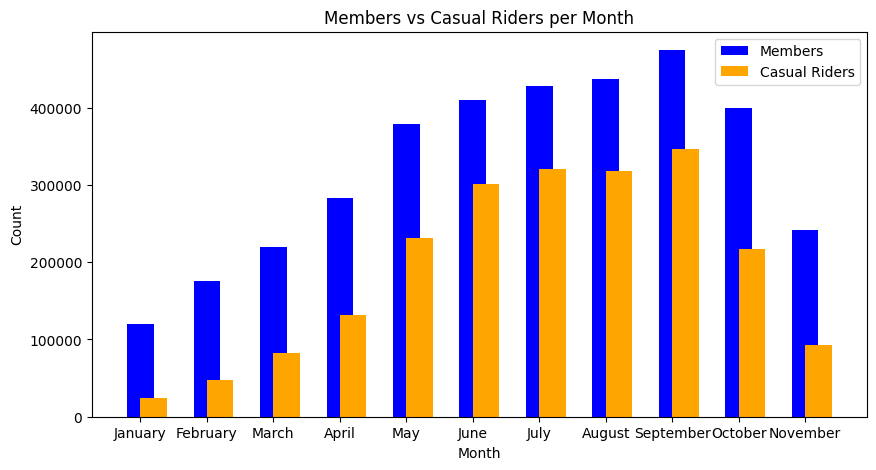

In [83]:
months = [ "January","February","March","April","May","June","July","August","September","October","November"]  # Add other months
members_counts = [ members_count_jan, members_count_feb, members_count_mar, members_count_apr, members_count_may, members_count_jun, members_count_jul, members_count_aug, members_count_sept, members_count_oct,members_count_nov,]  # Replace with actual values
casual_counts = [ casual_count_jan,casual_count_feb,casual_count_mar,casual_count_apr,casual_count_may,casual_count_jun,casual_count_jul,casual_count_aug,casual_count_sept,casual_count_oct,casual_count_nov,]  # Replace with actual values

plt.figure(figsize=(10, 5))
x = range(len(months))
plt.bar(x, members_counts, width=0.4, label="Members", color="blue", align="center")
plt.bar(x, casual_counts, width=0.4, label="Casual Riders", color="orange", align="edge")

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Members vs Casual Riders per Month")
plt.xticks(x, months)
plt.legend()
plt.show()


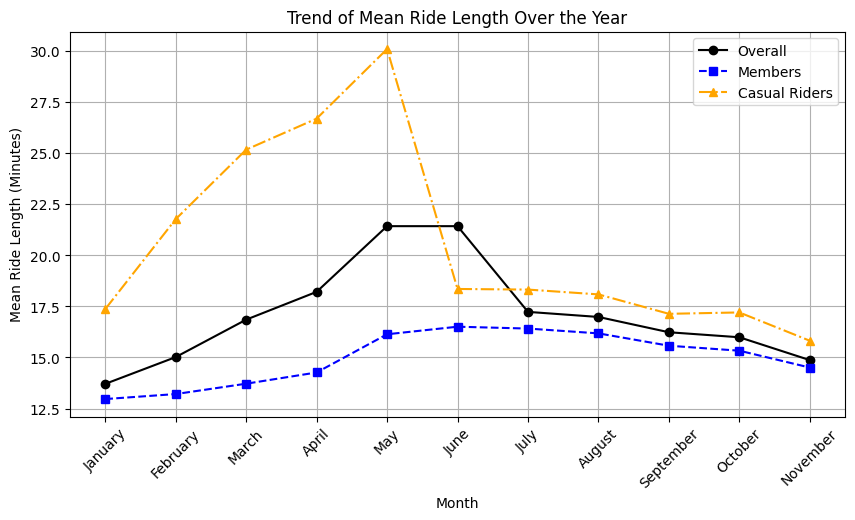

In [84]:
# Mean ride length for each month (replace with actual values)
mean_overall = [mean_ride_length_minutes_overall_jan, mean_ride_length_minutes_overall_feb, 
                mean_ride_length_minutes_overall_mar, mean_ride_length_minutes_overall_apr, 
                mean_ride_length_minutes_overall_may, mean_ride_length_minutes_overall_jun, 
                mean_ride_length_minutes_overall_jul, mean_ride_length_minutes_overall_aug, 
                mean_ride_length_minutes_overall_sept, mean_ride_length_minutes_overall_oct, 
                mean_ride_length_minutes_overall_nov]

mean_members = [mean_ride_length_minutes_members_jan, mean_ride_length_minutes_members_feb, 
                mean_ride_length_minutes_members_mar, mean_ride_length_minutes_members_apr, 
                mean_ride_length_minutes_members_may, mean_ride_length_minutes_members_jun, 
                mean_ride_length_minutes_members_jul, mean_ride_length_minutes_members_aug, 
                mean_ride_length_minutes_members_sept, mean_ride_length_minutes_members_oct, 
                mean_ride_length_minutes_members_nov]

mean_casual = [mean_ride_length_minutes_casual_jan, mean_ride_length_minutes_casual_feb, 
               mean_ride_length_minutes_casual_mar, mean_ride_length_minutes_casual_apr, 
               mean_ride_length_minutes_casual_may, mean_ride_length_minutes_casual_jun, 
               mean_ride_length_minutes_casual_jul, mean_ride_length_minutes_casual_aug, 
               mean_ride_length_minutes_casual_sept, mean_ride_length_minutes_casual_oct, 
               mean_ride_length_minutes_casual_nov]

plt.figure(figsize=(10, 5))
plt.plot(months, mean_overall, marker='o', linestyle='-', label="Overall", color='black')
plt.plot(months, mean_members, marker='s', linestyle='--', label="Members", color='blue')
plt.plot(months, mean_casual, marker='^', linestyle='-.', label="Casual Riders", color='orange')

plt.xlabel("Month")
plt.ylabel("Mean Ride Length (Minutes)")
plt.title("Trend of Mean Ride Length Over the Year")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Graph Type	Insight Provided
Bar Chart	Number of members vs casual users per month
Line Chart	Trends in ride duration over the year
Box Plot	Ride duration variations (outliers and spread)

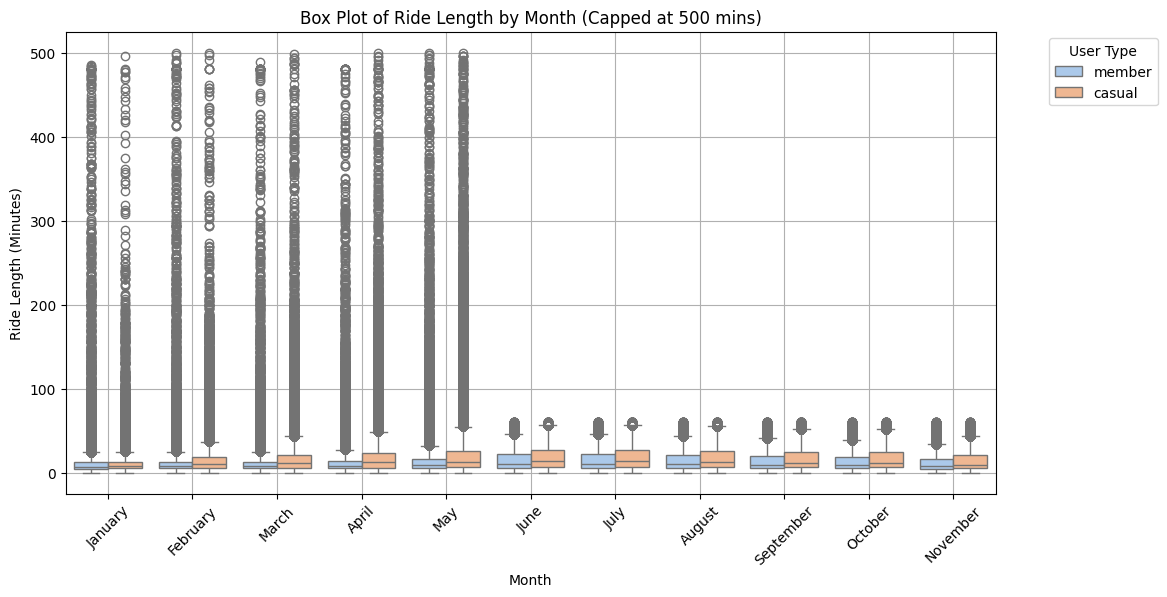

In [96]:
import seaborn as sns

# Combine data from all months
ride_lengths = {
    "Month": (["January"] * len(jan_df) + ["February"] * len(feb_df) + ["March"] * len(mar_df) +
              ["April"] * len(apr_df) + ["May"] * len(may_df) + ["June"] * len(jun_df) +
              ["July"] * len(jul_df) + ["August"] * len(aug_df) + ["September"] * len(sept_df) +
              ["October"] * len(oct_df) + ["November"] * len(nov_df)),

    "Ride Length (Minutes)": pd.concat([jan_df['ride_length_seconds'] / 60, feb_df['ride_length_seconds'] / 60,
                                        mar_df['ride_length_seconds'] / 60, apr_df['ride_length_seconds'] / 60,
                                        may_df['ride_length_seconds'] / 60, jun_df['ride_length_seconds'] / 60,
                                        jul_df['ride_length_seconds'] / 60, aug_df['ride_length_seconds'] / 60,
                                        sept_df['ride_length_seconds'] / 60, oct_df['ride_length_seconds'] / 60,
                                        nov_df['ride_length_seconds'] / 60]),
    
    "User Type": pd.concat([jan_df['member_casual'], feb_df['member_casual'], mar_df['member_casual'],
                            apr_df['member_casual'], may_df['member_casual'], jun_df['member_casual'],
                            jul_df['member_casual'], aug_df['member_casual'], sept_df['member_casual'],
                            oct_df['member_casual'], nov_df['member_casual']])
}

ride_df = pd.DataFrame(ride_lengths)

# Filter dataset to remove extreme ride lengths > 500 minutes
df_filtered = ride_df[ride_df['Ride Length (Minutes)'] <= 500]

# Set figure size
plt.figure(figsize=(12, 6))

# Use a pastel color palette for better contrast
sns.boxplot(data=df_filtered, x="Month", y="Ride Length (Minutes)", hue="User Type", palette="pastel")

# Improve readability
plt.xticks(rotation=45)  
plt.xlabel("Month")
plt.ylabel("Ride Length (Minutes)")
plt.title("Box Plot of Ride Length by Month (Capped at 500 mins)")

# Move legend outside the plot for clarity
plt.legend(title="User Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()


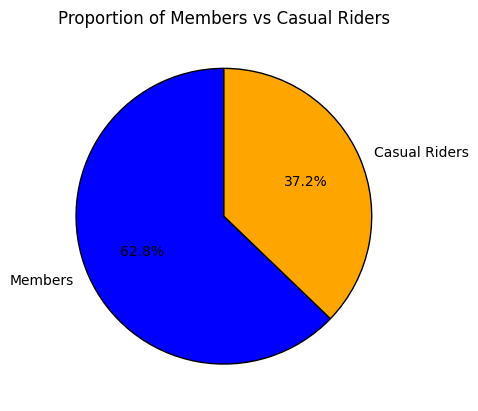

In [86]:
labels = ["Members", "Casual Riders"]
sizes = [sum(members_counts), sum(casual_counts)]
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Proportion of Members vs Casual Riders")
plt.show()


C:\Users\diyas\AppData\Local\Temp\ipykernel_14060\2217139463.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="User Type")


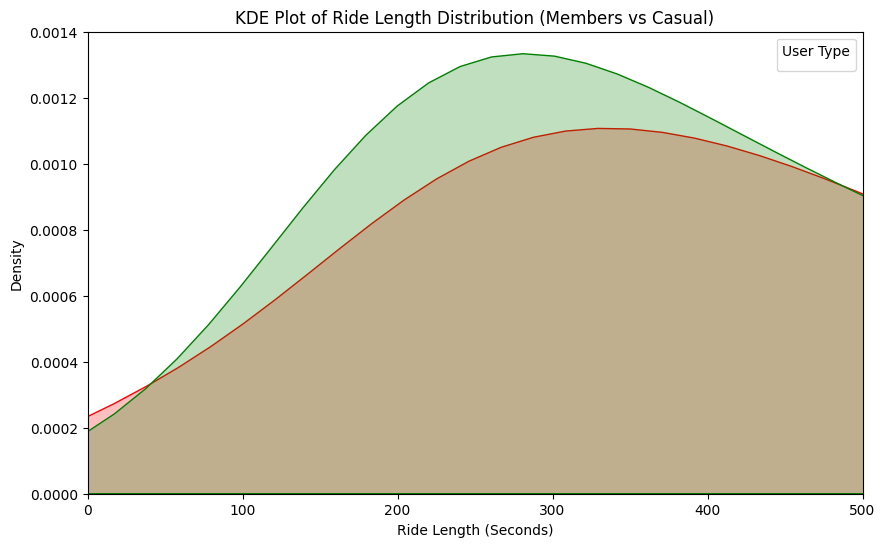

In [100]:
# KDE PLOT
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="ride_length_seconds", hue="member_casual", fill=True, common_norm=False,palette={"member": "green", "casual": "red"})
plt.xlim(0, 500)  # Adjust to remove extreme outliers
plt.xlabel("Ride Length (Seconds)")
plt.ylabel("Density")
plt.title("KDE Plot of Ride Length Distribution (Members vs Casual)")
plt.legend(title="User Type")
plt.show()


Observations:


Bar graph shows number of members vs casual users per month.
Number of members was greater than number of casual riders for every month. Casual riders showed an increase in number from January to September then decreased. Members as well showed an increase in number from January to September then decreased.

Line chart shows trends in ride duration over the year.
Linea chart shows the mean ride length of members,casual riders and both. This chart shows that mean ride length of members is less than casual riders. The mean ride length of casual riders saw a growth from january to may and suddnly decreased but was still greater than mean ride length of members.
This shows that members use the bicycle as their daily ride either going to work(office) or college on daily basis.

Box plot shows ride duration variations (outliers and spread).
Box plot shows many outliers giving a skewed vizualization depicting that the first few months have a high concentration of long ride times (>1400 minutes).Many outliers suggest some rides lasted unusually long due to paused rides.

Pie chart shows the percentage distribution of members vs casual riders.
This chart shows that there are 62.8% members and 37.2% casual riders in total for entire year.

KDE plot shows ride length distribution in seconds.

Conclusion:

The slow increase from January is seen as it is winter from January to March and from March to September its autumn and spring which explains the increase in use of clystic bikes.

1. Annual members and casual riders use Cyclistic bikes differently:
The bar graph shows that members consistently out number casual riders each month.
The line chart indicates that casual riders tend to have longer average ride durations compared to members, suggesting that casual users might use bikes for leisure or exploration, while members likely use them for daily commutes.
The box plot shows that casual riders have more extreme ride durations (outliers), possibly due to paused rides or different usage patterns.
The pie chart confirms that members (62.8%) form the majority of users, reinforcing that the service is primarily used by regular commuters.
The KDE plot further highlights that casual riders tend to have longer ride times compared to members.

3. Story my data tells:
Cyclistic bikes are predominantly used by members who take shorter and more consistent trips—likely for daily commutes.
Casual riders have longer and more varied ride durations, likely using the service for leisure rather than routine transport.
Both groups showed an increase in ridership from January to September, suggesting a seasonal effect where bike usage peaks in warmer months and declines afterward.
The presence of many extreme ride durations (outliers) suggests that some casual users may pause their rides instead of ending them properly.


5. My findings related to original question "How do Annual members and casual riders use Cyclistic bikes differently?":
The findings confirm that members and casual riders use Cyclistic bikes differently—members use them for short, consistent commutes, while casual riders take longer rides, likely for recreational purposes.
The seasonal trend in ridership also aligns with expected biking behavior (higher usage in warmer months , lower in colder months).
The discrepancy in ride duration suggests that Cyclistic could further optimize pricing or features for each group.


7. My audience and best way to communicate with them:
Audience: Cyclistic’s marketing and operations team, city planners, and policymakers.
Best communication method:
Graphs & visual storytelling—Using bar charts, line charts, and pie charts for clear trend visualization.
Concise summaries—Highlighting key takeaways (e.g., casual riders take longer trips, members are the majority).
Actionable insights—Providing recommendations based on the findings.


9. Final conclusion based on my analysis:
Members are the backbone of Cyclistic’s user base, using bikes for daily commutes with shorter ride durations.
Casual riders tend to take longer rides and show more seasonal variation in their usage.
There’s a need for targeted strategies:
Encouraging casual riders to become members through promotional offers.
Addressing ride duration outliers (e.g., educating users on proper ride-ending procedures).
Optimizing pricing structures based on ride durations and seasonal trends.


11. Use insights to:
Marketing strategy: Create promotional plans to convert casual riders into members.
Operational improvements: Improve ride-ending processes to reduce excessive ride durations.
Seasonal campaigns: Launch summer promotions to attract more casual riders when demand is high.


13. Next steps based on my findings:
Analyze outliers in ride durations to determine if adjustments in pricing or policies are needed.
Investigate why casual riders take longer rides—Is it due to route preferences, pricing models, or lack of membership incentives?
Enhance membership benefits to attract more long-term users.
Consider city-wide collaborations to promote biking as a daily transport alternative.

14. Many other things like user_id, start_date and end_date, subscription pricing and price for 1 ride can be added into dataset of all months to analyze and get more better insights.